In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('MICRODADOS_ENEM_2023.csv', encoding='latin1', sep=';')

In [15]:
# Função para adicionar as top labels nos gráficos de barras
def add_top_bar_labels(bars, bottom_label_margin):
    for bar in bars:
        plt.text(
            bar.get_x() + bar.get_width() / 2, 
            bar.get_height() + bottom_label_margin, 
            f"{bar.get_height():,.0f}".replace(",", "."), 
            ha="center", 
            fontsize=10
        )

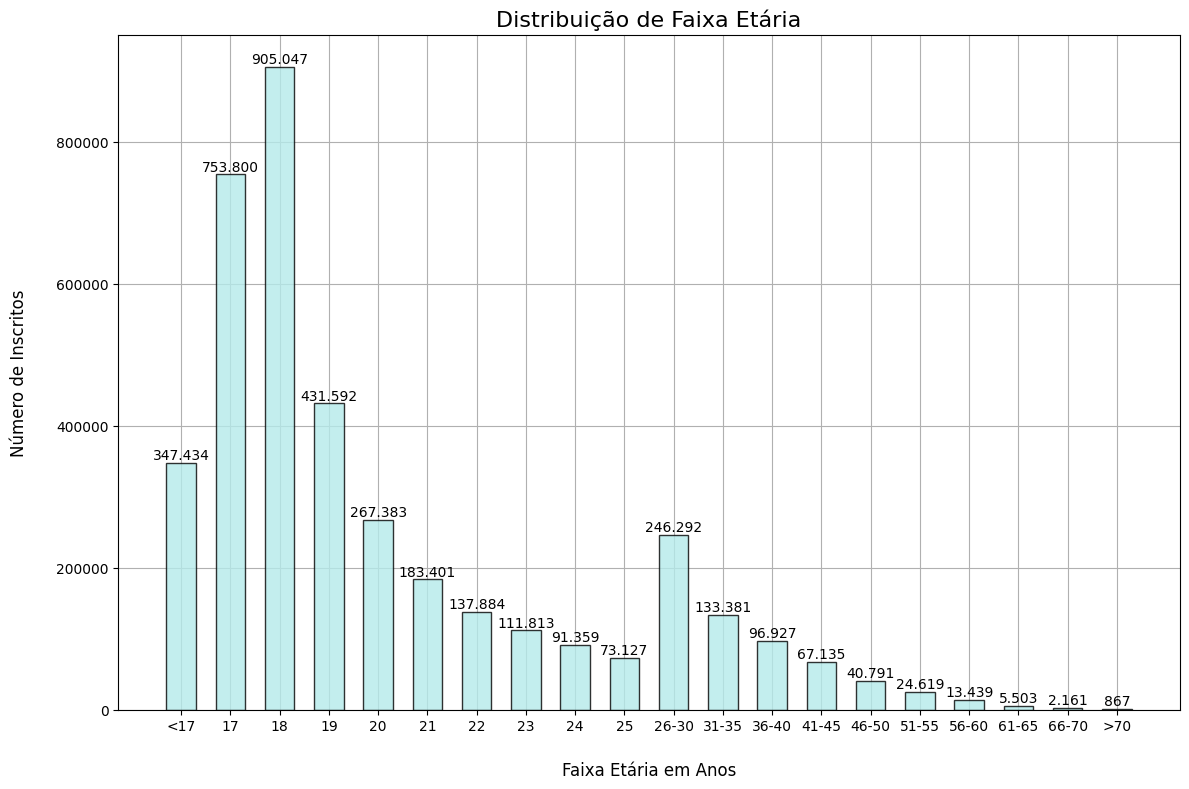

In [16]:
# Distribuição de Faixa Etária dos Participantes do ENEM 2023

age_distribution_map = {
    1: "<17", 
    2: "17", 
    3: "18", 
    4: "19", 
    5: "20", 
    6: "21", 
    7: "22", 
    8: "23", 
    9: "24", 
    10: "25", 
    11: "26-30", 
    12: "31-35", 
    13: "36-40", 
    14: "41-45", 
    15: "46-50", 
    16: "51-55", 
    17: "56-60", 
    18: "61-65", 
    19: "66-70", 
    20: ">70"
}       

data["Faixa Etária"] = data["TP_FAIXA_ETARIA"].map(age_distribution_map)
age_distribution_order = list(age_distribution_map.values())
    
age_distribution = data["Faixa Etária"].value_counts()
age_distribution = age_distribution.reindex(age_distribution_order, fill_value=0)

plt.figure(figsize=(12, 8))
bars = plt.bar(age_distribution.index, age_distribution.values, color="#B5EAEA", edgecolor="black", width=0.6, zorder=2, alpha=0.8)
    
add_top_bar_labels(bars, 5000)
    
plt.title("Distribuição de Faixa Etária", fontsize=16)
plt.xlabel("Faixa Etária em Anos", fontsize=12, labelpad=20)
plt.ylabel("Número de Inscritos", fontsize=12, labelpad=20)
plt.xticks(ha="center", fontsize=10)
plt.yticks(fontsize=10)
plt.grid(zorder=0)
plt.tight_layout()
plt.savefig('1.png')
plt.show()

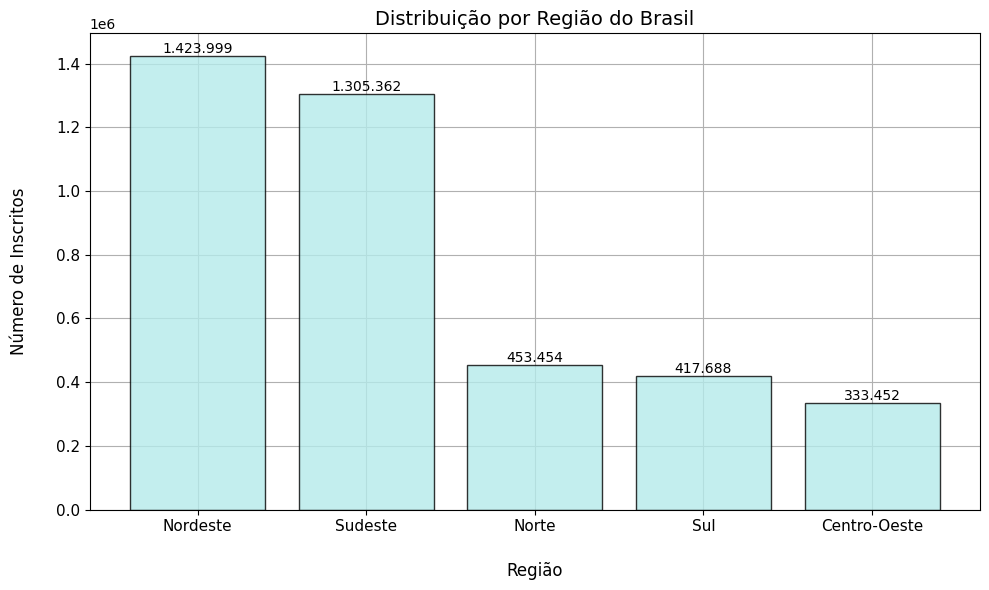

In [17]:
# Ditribuição por Região dos Inscritos no ENEM 2023
regions = {
    "Norte": ["AC", "AP", "AM", "PA", "RO", "RR", "TO"],
    "Nordeste": ["AL", "BA", "CE", "MA", "PB", "PE", "PI", "RN", "SE"],
    "Centro-Oeste": ["DF", "GO", "MS", "MT"],
    "Sudeste": ["ES", "MG", "RJ", "SP"],
    "Sul": ["PR", "RS", "SC"]
}

def get_region(uf):
    for region, ufs in regions.items():
        if uf in ufs:
            return region

data["ST_REGIAO"] = data["SG_UF_PROVA"].apply(get_region)

participants_by_region = data["ST_REGIAO"].value_counts().reset_index()
participants_by_region.columns = ["Região", "Número de Inscritos"]

plt.figure(figsize=(10, 6))
bars = plt.bar(
    participants_by_region["Região"], 
    participants_by_region["Número de Inscritos"], 
    color="#B5EAEA", 
    edgecolor="black",
    alpha=0.8,
    zorder=2,
)

add_top_bar_labels(bars, 10000)

plt.title("Distribuição por Região do Brasil", fontsize=14)
plt.xlabel("Região", fontsize=12, labelpad=20)
plt.ylabel("Número de Inscritos", fontsize=12, labelpad=20)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(zorder=2)
plt.tight_layout()
plt.savefig('2.png')
plt.show()

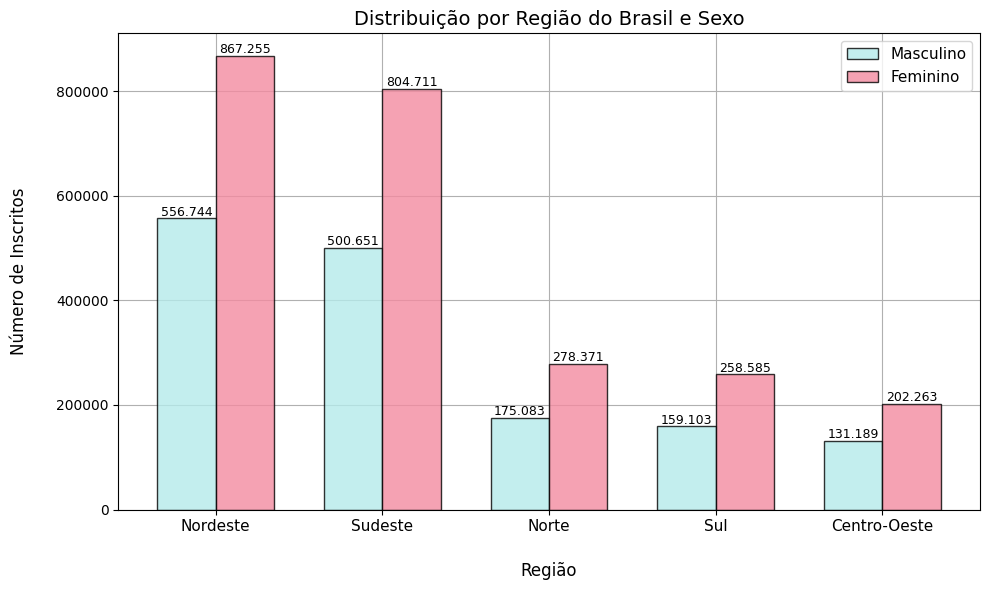

In [18]:
# Número de Inscritos no ENEM 2023 por Região e Sexo
sex_type_and_region_data = data[["TP_SEXO", "ST_REGIAO"]]

grouped_data = sex_type_and_region_data.groupby(["ST_REGIAO", "TP_SEXO"]).size().reset_index(name="Número de Inscritos")

total_by_region = grouped_data.groupby("ST_REGIAO")["Número de Inscritos"].sum().sort_values(ascending=False)

grouped_data["ST_REGIAO"] = pd.Categorical(
    grouped_data["ST_REGIAO"], 
    categories=total_by_region.index, 
    ordered=True
)

grouped_data = grouped_data.sort_values(["ST_REGIAO", "TP_SEXO"])

pivot_data = grouped_data.pivot(index="ST_REGIAO", columns="TP_SEXO", values="Número de Inscritos").fillna(0)

x = np.arange(len(pivot_data))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

bars_m = ax.bar(x - width/2, pivot_data.get("M", 0), width, label="Masculino", color="#B5EAEA", edgecolor="black", alpha=0.8, zorder=2)
bars_f = ax.bar(x + width/2, pivot_data.get("F", 0), width, label="Feminino", color="#F38BA0", edgecolor="black", alpha=0.8, zorder=2)

for bars in [bars_m, bars_f]:
    for rect in bars:
        ax.text(
            rect.get_x() + rect.get_width()/2,
            rect.get_height() + 5000, 
            f"{rect.get_height():,.0f}".replace(",", "."),
            ha="center",
            fontsize=9
        )

ax.set_title("Distribuição por Região do Brasil e Sexo", fontsize=14)
ax.set_xlabel("Região", fontsize=12, labelpad=20)
ax.set_ylabel("Número de Inscritos", fontsize=12, labelpad=20)
ax.set_xticks(x)
ax.set_xticklabels(pivot_data.index, fontsize=11)
ax.legend(fontsize=11)
plt.grid(zorder=0)
plt.tight_layout()
plt.savefig('3.png')
plt.show()

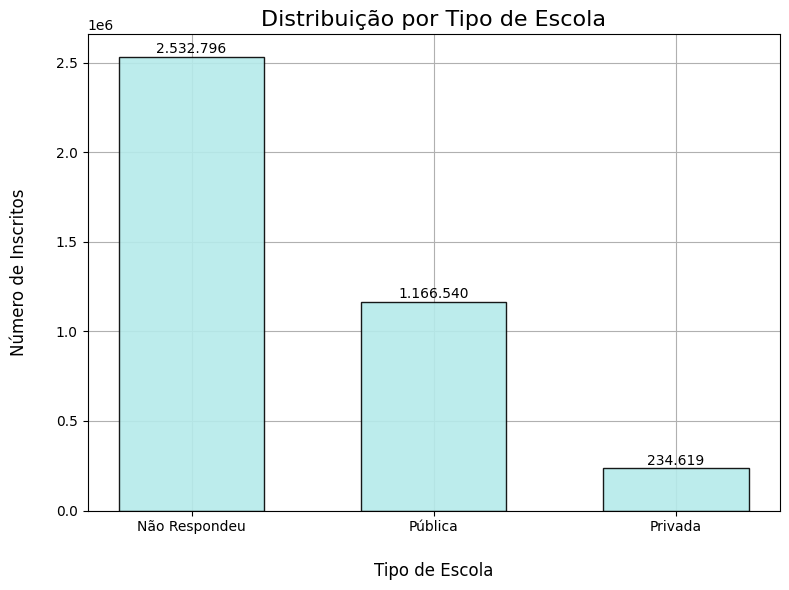

In [19]:
# Distribuição por Tipo de Escola dos Participantes do ENEM 2023
school_type_map = {
    1: "Não Respondeu",
    2: "Pública",
    3: "Privada"
}

data["Tipo de Escola"] = data["TP_ESCOLA"].map(school_type_map)

school_type_distribution = data["Tipo de Escola"].value_counts()

plt.figure(figsize=(8, 6))
bars = plt.bar(
    school_type_distribution.index, 
    school_type_distribution.values, 
    color="#B5EAEA", 
    edgecolor="black", 
    width=0.6, 
    alpha=0.9, 
    zorder=2
)

add_top_bar_labels(bars, 20000)

plt.title("Distribuição por Tipo de Escola", fontsize=16)
plt.xlabel("Tipo de Escola", fontsize=12, labelpad=20)
plt.ylabel("Número de Inscritos", fontsize=12, labelpad=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.grid(zorder=0)
plt.tight_layout()
plt.savefig('4.png')
plt.show()

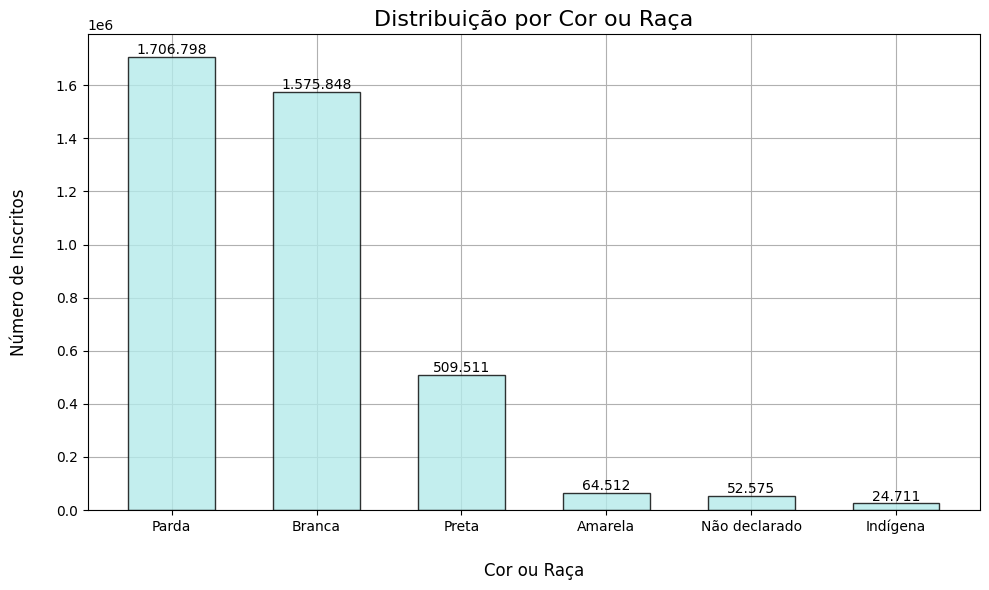

In [20]:
# Distribuição por Cor ou Raça dos Participantes do ENEM 2023
race_map = {
    0: "Não declarado",
    1: "Branca",
    2: "Preta",
    3: "Parda",
    4: "Amarela",
    5: "Indígena",
    6: "Não dispõe da informação"
}

data["Cor ou Raça"] = data["TP_COR_RACA"].map(race_map)

race_distribution = data["Cor ou Raça"].value_counts()

plt.figure(figsize=(10, 6))
bars = plt.bar(race_distribution.index, race_distribution.values, color="#B5EAEA", edgecolor="black", width=0.6, alpha=0.8, zorder=2)

add_top_bar_labels(bars, 10000)

plt.title("Distribuição por Cor ou Raça", fontsize=16)
plt.xlabel("Cor ou Raça", fontsize=12, labelpad=20)
plt.ylabel("Número de Inscritos", fontsize=12, labelpad=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.grid(zorder=0)
plt.tight_layout()
plt.savefig('5.png')
plt.show()

In [21]:
# Distribuição da Escolaridade do Pai dos Inscritos do ENEM 2023
q001_distribution = data["Q001"].value_counts()
print(q001_distribution)

Q001
E    1114164
B     700175
C     513213
D     438139
H     403526
F     333981
G     256045
A     174712
Name: count, dtype: int64


In [22]:
# Distribuição da Escolaridade das Mães dos Inscritos do ENEM 2023
q002_distribution = data["Q002"].value_counts()

print(q002_distribution)

Q002
E    1377605
B     505525
D     473854
F     455268
G     441893
C     437022
H     131957
A     110831
Name: count, dtype: int64


In [23]:
# Distribuição de Renda por Família dos Inscritos do ENEM 2023
income_distribution = data["Q006"].value_counts()

print(income_distribution)

Q006
B    1245271
C     650942
D     437366
E     293994
A     268053
G     261327
F     171344
H     139279
I      85970
J      75179
K      59631
Q      51489
N      41565
O      41218
L      39596
P      38105
M      33626
Name: count, dtype: int64


Número de Computadores
Não                    2041637
Sim, um                1362634
Sim, dois               341120
Sim, três               126296
Sim, quatro ou mais      62268
Name: count, dtype: int64


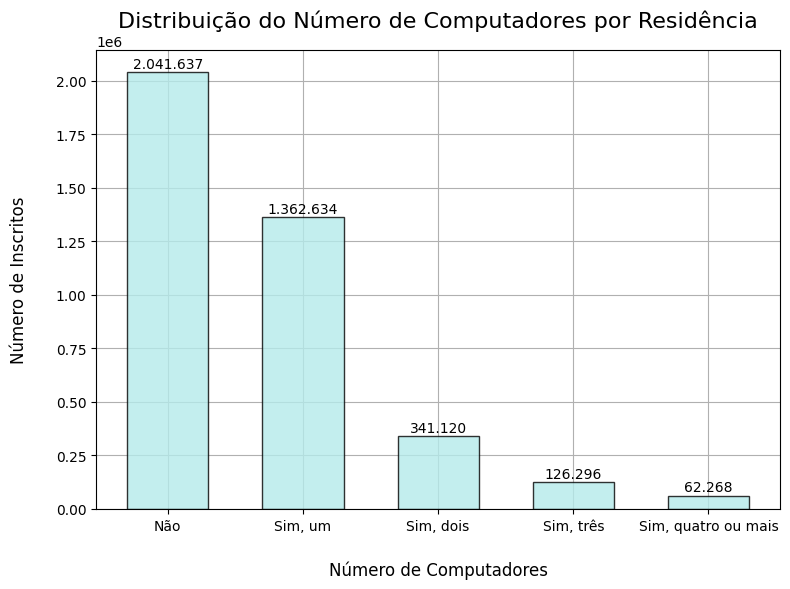

In [24]:
# Distribuição do Número de Computadores na Residência do Inscrito do ENEM 2023
number_of_computers_map = {
    "A": "Não",
    "B": "Sim, um",
    "C": "Sim, dois",
    "D": "Sim, três",
    "E": "Sim, quatro ou mais"
}

data["Número de Computadores"] = data["Q024"].map(number_of_computers_map)

number_of_computers_distribution = data["Número de Computadores"].value_counts()

print(number_of_computers_distribution)

plt.figure(figsize=(8, 6))
bars = plt.bar(
    number_of_computers_distribution.index, 
    number_of_computers_distribution.values, 
    color="#B5EAEA", 
    edgecolor="black", 
    width=0.6, 
    alpha=0.8, 
    zorder=2
)

add_top_bar_labels(bars, 20000)

plt.title("Distribuição do Número de Computadores por Residência", fontsize=16)
plt.xlabel("Número de Computadores", fontsize=12, labelpad=20)
plt.ylabel("Número de Inscritos", fontsize=12, labelpad=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.grid(zorder=0)
plt.tight_layout()
plt.savefig('6.png')
plt.show()

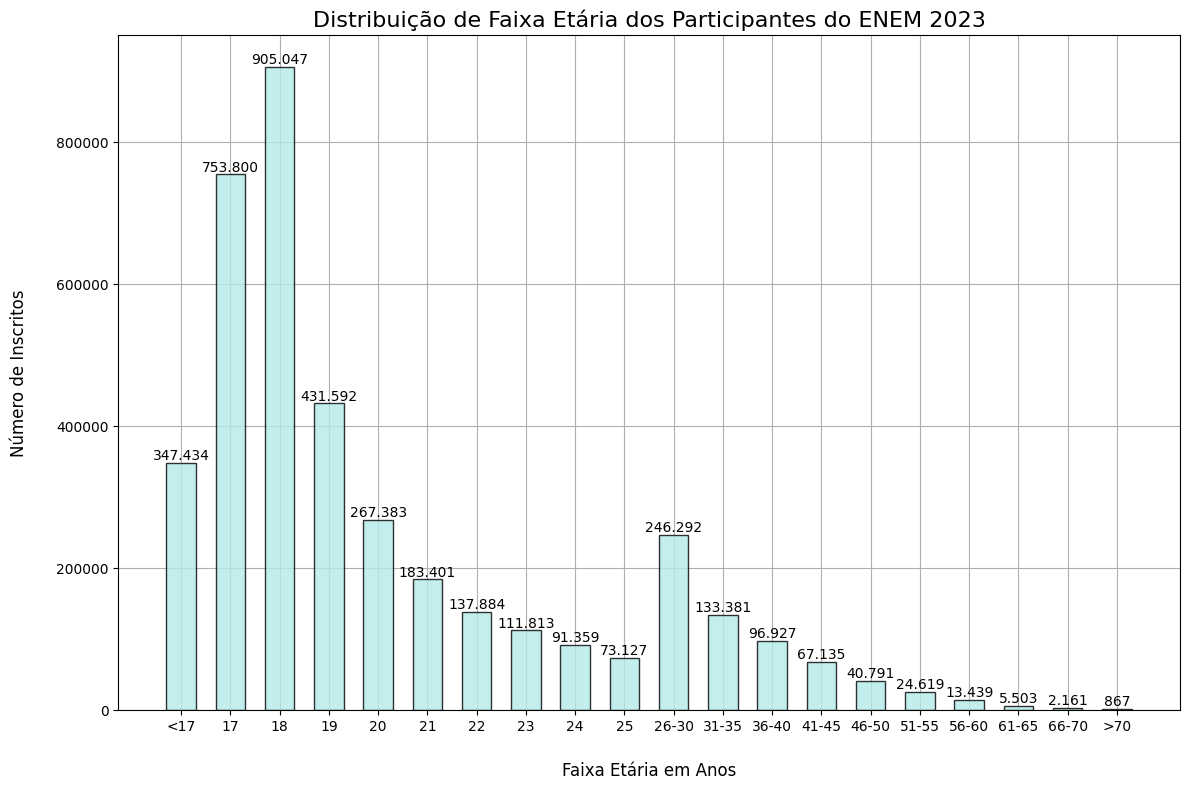

In [25]:
age_distribution_map = {
    1: "<17", 
    2: "17", 
    3: "18", 
    4: "19", 
    5: "20", 
    6: "21", 
    7: "22", 
    8: "23", 
    9: "24", 
    10: "25", 
    11: "26-30", 
    12: "31-35", 
    13: "36-40", 
    14: "41-45", 
    15: "46-50", 
    16: "51-55", 
    17: "56-60", 
    18: "61-65", 
    19: "66-70", 
    20: ">70"
}       

data["Faixa Etária"] = data["TP_FAIXA_ETARIA"].map(age_distribution_map)
age_distribution_order = list(age_distribution_map.values())
    
age_distribution = data["Faixa Etária"].value_counts()
age_distribution = age_distribution.reindex(age_distribution_order, fill_value=0)

plt.figure(figsize=(12, 8))
bars = plt.bar(age_distribution.index, age_distribution.values, color="#B5EAEA", edgecolor="black", width=0.6, zorder=2, alpha=0.8)
    
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        bar.get_height() + 5000, 
        f"{bar.get_height():,.0f}".replace(",", "."), 
        ha="center", 
        fontsize=10
    )
    
plt.title("Distribuição de Faixa Etária dos Participantes do ENEM 2023", fontsize=16)
plt.xlabel("Faixa Etária em Anos", fontsize=12, labelpad=20)
plt.ylabel("Número de Inscritos", fontsize=12, labelpad=20)
plt.xticks(ha="center", fontsize=10)
plt.yticks(fontsize=10)
plt.grid(zorder=0)

plt.tight_layout()
plt.show()


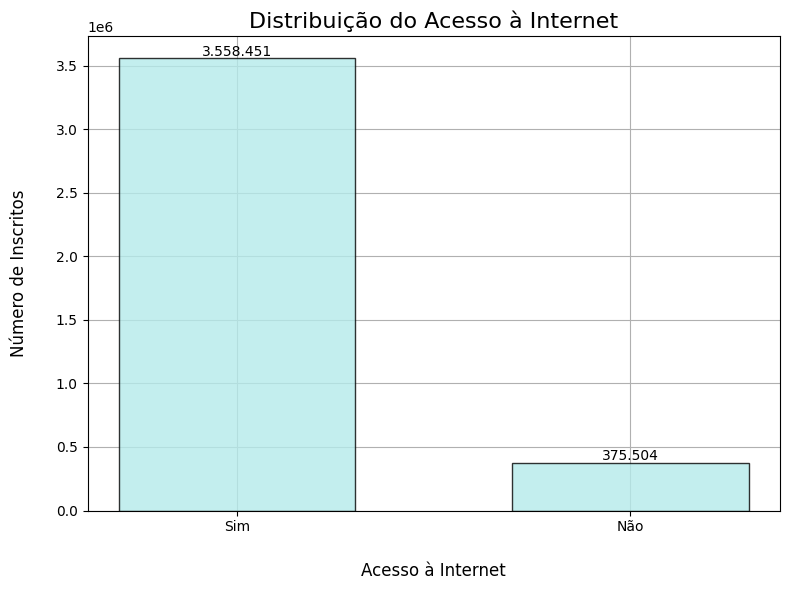

In [26]:
# Distribuição do Acesso à Internet do Inscrito do ENEM 2023
internet_access_map = {
    "A": "Não",
    "B": "Sim",
}

data["Acesso à Internet"] = data["Q025"].map(internet_access_map)

internet_access_distribution = data["Acesso à Internet"].value_counts()

plt.figure(figsize=(8, 6))
bars = plt.bar(
    internet_access_distribution.index, 
    internet_access_distribution.values, 
    color="#B5EAEA", 
    edgecolor="black", 
    width=0.6, 
    alpha=0.8, 
    zorder=2
)

add_top_bar_labels(bars, 20000)

plt.title("Distribuição do Acesso à Internet", fontsize=16)
plt.xlabel("Acesso à Internet", fontsize=12, labelpad=20)
plt.ylabel("Número de Inscritos", fontsize=12, labelpad=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.grid(zorder=0)
plt.tight_layout()
plt.savefig('7.png')
plt.show()